In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

In [2]:
#Get data from Alpha Vantage using API request

url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}



response = requests.get(url, params=params)
data = response.json()

def df_from_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def convert_response(d):
        # convert the response into datetimerecords that can be
        # parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

df = df_from_response(data)
df.reset_index(level=0, inplace=True)
df.head(2)

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000


In [3]:
#Convert results into a dataframe and assign an index
df1 = pd.DataFrame(df)
df1.reset_index(level=0, inplace=True)
df1.head(2)

,index,date,Open,High,Low,Close,AdjClose,Volume
0,0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000


In [4]:
# Select the date range we want to plot (this one will be for the year 2000)
df_2000 = df1[(df1['date'] > '2000-07-01') & (df1['date'] < '2000-09-30')]
df_2000.head(3)

,index,date,Open,High,Low,Close,AdjClose,Volume
630,630,2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
631,631,2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
632,632,2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900


In [5]:
# Select the date range we want to plot (this one will be for the year 2001)
df_2001 = df1[(df1['date'] > '2001-07-01') & (df1['date'] < '2001-09-30')]
df_2001.head(3)

,index,date,Open,High,Low,Close,AdjClose,Volume
881,881,2001-07-02,58.9900,60.2200,58.9900,59.9800,20.4474,2085500
882,882,2001-07-03,60.0000,60.4500,59.3800,60.2500,20.5394,707500
883,883,2001-07-05,60.1000,60.1000,59.0500,59.6300,20.3280,1155600


In [6]:
# Select the column of data needed for plotting - Year 2000
df_2000_close = pd.DataFrame(df_2000[['date','Close']])
df_2000_close.Close.dtype
df_2000_close.Close = df_2000_close.Close.astype(float)
df_2000_close.head(3)

,date,Close
630,2000-07-03,59.88
631,2000-07-05,59.31
632,2000-07-06,58.81


In [7]:
# Select the column of data needed for plotting - Year 2001
df_2001_close = pd.DataFrame(df_2001[['date','Close']])
df_2001_close.Close.dtype
df_2001_close.Close = df_2001_close.Close.astype(float)
df_2001_close.head(3)

,date,Close
881,2001-07-02,59.98
882,2001-07-03,60.25
883,2001-07-05,59.63


In [8]:
# Set the date an index
df_2000_close = df_2000_close.set_index('date')
df_2001_close = df_2001_close.set_index('date')

In [9]:
# Use rolling method to plot moving averages
df_2000_close['MA_5'] = df_2000_close.Close.rolling(5).mean().shift()
df_2000_close['MA_15'] = df_2000_close.Close.rolling(15).mean().shift()
df_2000_close.head(3)

,Close,MA_5,MA_15
date,,,
2000-07-03,59.88,NaN,NaN
2000-07-05,59.31,NaN,NaN
2000-07-06,58.81,NaN,NaN


In [10]:
# Use rolling method to plot moving averages
df_2001_close['MA_5'] = df_2001_close.Close.rolling(5).mean().shift()
df_2001_close['MA_15'] = df_2001_close.Close.rolling(15).mean().shift()
df_2001_close.head(3)

,Close,MA_5,MA_15
date,,,
2001-07-02,59.98,NaN,NaN
2001-07-03,60.25,NaN,NaN
2001-07-05,59.63,NaN,NaN


In [11]:
#For the the column values to be used in the plots, we MUST convert them into numeric values first.
# the date was converted in datatime after creating the dataframe
df_2000_close.Close=pd.to_numeric(df_2000_close.Close)
df_2001_close.Close=pd.to_numeric(df_2001_close.Close)

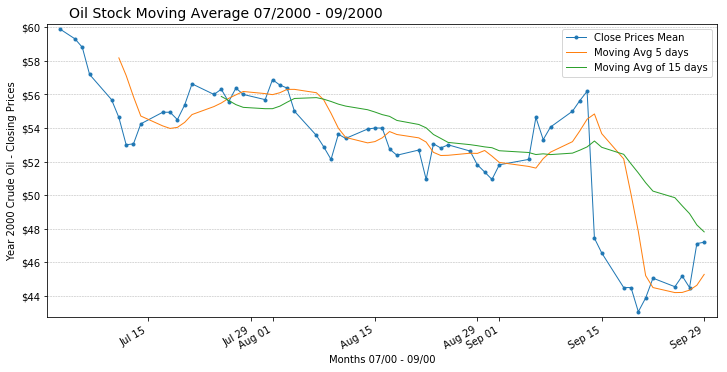

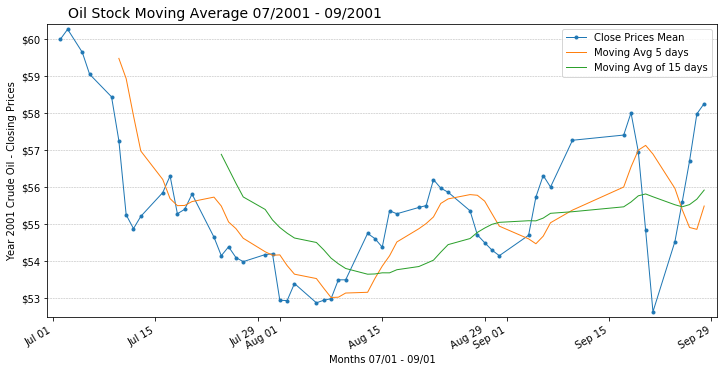

In [12]:
# Plot data and moving averages of 10 rolling standard deviation
# Moving Average plot for the year 2000

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax.plot(df_2000_close['Close'],label='Close Prices Mean',  marker='.', linestyle='-', linewidth=1,)
ax.plot(df_2000_close['MA_5'], label='Moving Avg 5 days', linestyle='-', linewidth=1,)
ax.plot(df_2000_close['MA_15'], label='Moving Avg of 15 days', linestyle='-', linewidth=1,)

plt.title('Oil Stock Moving Average 07/2000 - 09/2000', fontsize=14, ha='right')
plt.ylabel('Year 2000 Crude Oil - Closing Prices')
plt.xlabel('Months 07/00 - 09/00')
plt.legend()
plt.margins(0.02)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter('${:.0f}'.format))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()


#---------------------------------------------------------------------------------------------------------------------
# Moving Average plot for the year 2001

fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax.plot(df_2001_close['Close'],label='Close Prices Mean',  marker='.', linestyle='-', linewidth=1,)
ax.plot(df_2001_close['MA_5'], label='Moving Avg 5 days', linestyle='-', linewidth=1,)
ax.plot(df_2001_close['MA_15'], label='Moving Avg of 15 days', linestyle='-', linewidth=1,)

plt.title('Oil Stock Moving Average 07/2001 - 09/2001', fontsize=14, ha='right')
plt.ylabel('Year 2001 Crude Oil - Closing Prices')
plt.xlabel('Months 07/01 - 09/01')
plt.legend()
plt.margins(0.02)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter('${:.0f}'.format))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()
plt.show()

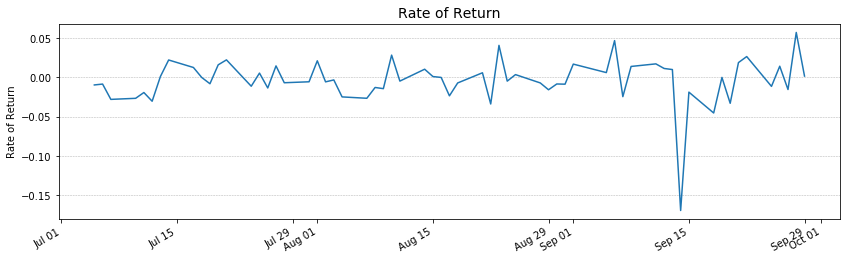

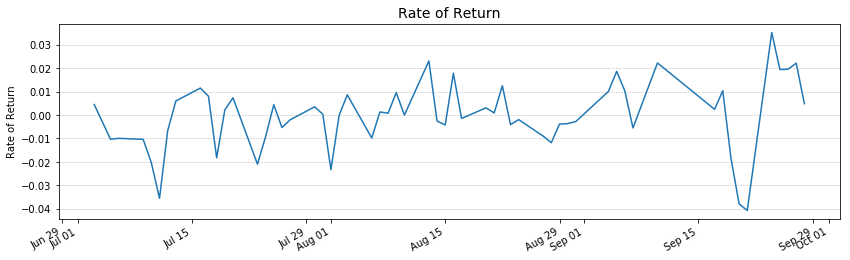

In [13]:
# Compute log change (instantaneous rate of return) for the year 2000

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 4))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

df_2000_close["change"] = np.log(df_2000_close["Close"] / df_2000_close["Close"].shift())
plt.plot(df_2000_close.change)

plt.title('Rate of Return', fontsize=14, ha='center')
plt.ylabel('Rate of Return')
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()


#-----------------------------------------------------------------------------------------------
# Rate or return plot for the year 2001

fig, ax = plt.subplots(figsize=(14, 4))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

df_2001_close["change"] = np.log(df_2001_close["Close"] / df_2001_close["Close"].shift())
plt.plot(df_2001_close.change)

plt.title('Rate of Return', fontsize=14, ha='center')
plt.ylabel('Rate of Return')
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()
plt.show()

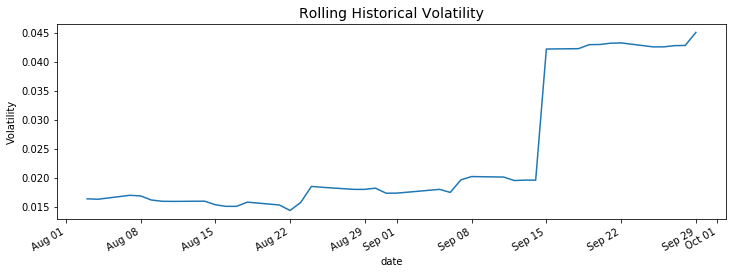

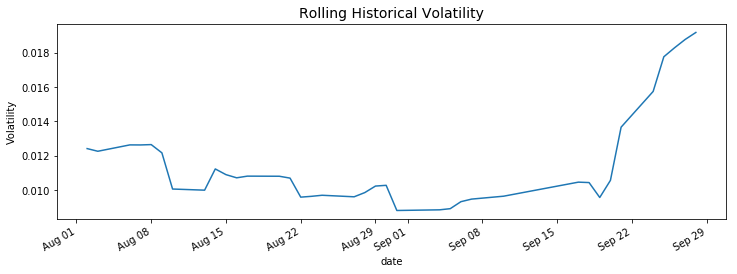

In [14]:
#  Compute rolling historical volatility, offset using .shift() method for the year 2000

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 4))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

df_2000_close['Volatility'] = df_2000_close.change.rolling(21).std().shift()
df_2000_close['Volatility'].plot()

plt.title('Rolling Historical Volatility', fontsize=14, ha='center')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#------------------------------------------------------------------------------------
# Compute rolling historical volatility, offset using .shift() method for the year 2001

fig, ax = plt.subplots(figsize=(12, 4))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

df_2001_close['Volatility'] = df_2001_close.change.rolling(21).std().shift()
df_2001_close['Volatility'].plot()

plt.title('Rolling Historical Volatility', fontsize=14, ha='center')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()
plt.show()


In [15]:
# price analysis
#offset expected change 1-day
df_2000_close['exp_chng'] = df_2000_close['Volatility'] * df_2000_close['Close'].shift()
df_2000_close['actual_chng'] = df_2000_close['Close'] - df_2000_close['Close'].shift()
#running more than once will 
df_2000_close = pd.DataFrame(df_2000_close.iloc[22:])
df_2000_close['Magnitude'] = df_2000_close['actual_chng'] / df_2000_close['exp_chng'] 
df_2000_close['abs_magni'] = np.abs(df_2000_close['Magnitude'])
df_2000_close.head(2)

,Close,MA_5,MA_15,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
date,,,,,,,,,
2000-08-03,56.38,56.302,55.538667,-0.003188,0.016370,0.925894,-0.18,-0.194407,0.194407
2000-08-04,55.00,56.302,55.760000,-0.024781,0.016296,0.918752,-1.38,-1.502038,1.502038


In [16]:
# price analysis
#offset expected change 1-day
df_2001_close['exp_chng'] = df_2001_close['Volatility'] * df_2001_close['Close'].shift()
df_2001_close['actual_chng'] = df_2001_close['Close'] - df_2001_close['Close'].shift()
#running more than once will 
df_2001_close = pd.DataFrame(df_2001_close.iloc[22:])
df_2001_close['Magnitude'] = df_2001_close['actual_chng'] / df_2001_close['exp_chng'] 
df_2001_close['abs_magni'] = np.abs(df_2001_close['Magnitude'])
df_2001_close.head(2)

,Close,MA_5,MA_15,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
date,,,,,,,,,
2001-08-02,52.94,53.884,54.756000,-0.000189,0.012412,0.657205,-0.01,-0.015216,0.015216
2001-08-03,53.40,53.652,54.626667,0.008652,0.012256,0.648846,0.46,0.708951,0.708951


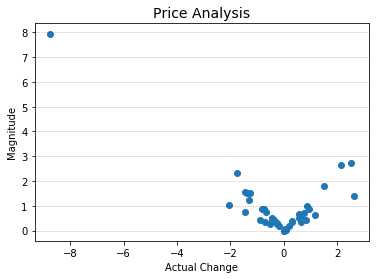

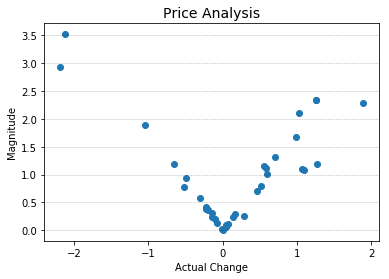

In [17]:
fig, ax = plt.subplots()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.scatter(df_2000_close['actual_chng'], df_2000_close['abs_magni'])

plt.title('Price Analysis', fontsize=14, ha='center')
plt.ylabel('Magnitude')
plt.xlabel('Actual Change')

#---------------------------------------------------------------------------

fig, ax = plt.subplots()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.scatter(df_2001_close['actual_chng'], df_2001_close['abs_magni'])

plt.title('Price Analysis', fontsize=14, ha='center')
plt.ylabel('Magnitude')
plt.xlabel('Actual Change')
plt.show()